#### 무게를 찾기
- 목표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습 방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 >>> 데이터 분포가 선형의 형태

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
DATA_FILE='../data/fish.csv'
fishDF=pd.read_csv(DATA_FILE,usecols=(0,1,2))
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [8]:
featureDF = fishDF[['Length']]
targetSR = fishDF['Weight']

print(featureDF.shape, featureDF.ndim)
print(targetSR.shape, targetSR.ndim)

(159, 1) 2
(159,) 1


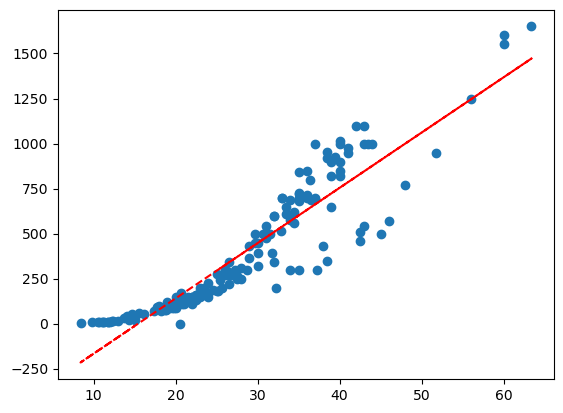

In [15]:
from scipy import stats
x =fishDF['Length']
y = fishDF['Weight']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r--')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR,test_size=0.2,random_state=42)

In [11]:
# 인스턴스생성
model=LinearRegression()
# 학습진행
model.fit(X_train,y_train)

LinearRegression()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly=PolynomialFeatures(include_bias=False)
model=LinearRegression()
pipe=Pipeline([('poly',poly),('lrmodel',model)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lrmodel', LinearRegression())])

In [13]:
pipe.named_steps['lrmodel'].coef_

array([14.42829216,  0.25152077])

In [14]:
pipe.named_steps['poly'].degree

2